# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# more libraries here...

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

## 1. Data Cleaning

In [5]:
ls

classification-assessment-mini-project.ipynb
classification_lab_data.csv
classification_lab_data_holdout_features.csv


In [6]:
df = pd.read_csv('classification_lab_data_holdout_features.csv')

In [7]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,30000,1,1,2,29,0,0,0,0,0,-1,17960,18968,19958,21448,15567,22,1610,1600,2050,341,22,5000
1,640000,2,1,2,30,0,0,0,0,0,0,116714,77893,60259,40539,26432,5018,4000,4000,2003,7202,5314,3535
2,270000,2,1,2,29,0,0,0,0,-1,-1,14728,20865,24812,12674,9486,2460,10000,5000,3900,9486,2460,0
3,160000,1,1,1,40,0,0,2,2,-1,2,4024,6484,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,160000,2,2,2,25,-1,-1,-1,-1,0,0,1532,0,465,1791,1644,956,0,465,1792,33,0,2394
5,110000,2,4,1,37,0,0,0,0,0,0,70204,69876,69584,59666,60916,61423,2745,2800,2200,2200,2207,3003
6,320000,2,1,2,32,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,0,-400,0,0,0,1,400,6083
7,80000,1,1,1,33,0,0,0,0,0,0,45524,62969,36217,36386,41596,27635,2000,10000,2000,6500,8000,5000
8,360000,1,1,2,34,2,2,-2,-2,-2,-2,2500,0,0,0,0,0,0,0,0,0,0,0
9,360000,2,2,1,36,0,0,2,0,0,2,63389,48359,37054,50009,53984,25258,15000,11,20000,5000,0,37000


## 2. EDA

In [8]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000
mean,166118.980170,1.604233,1.838527,1.556241,35.334611,-0.023663,-0.129478,-0.168472,-0.234961,-0.285619,-0.312115,49760.820363,47808.868855,45166.853191,41128.830362,38565.171971,37451.688219,5567.042160,5527.614064,5115.139310,4832.420263,4696.824363,5094.966172
std,129077.567796,0.489056,0.783851,0.520139,9.071366,1.135388,1.213699,1.210281,1.170805,1.133758,1.148217,71720.028327,69632.867171,66612.318592,61857.157340,58892.693860,57404.431820,16012.069319,15659.285542,16087.560921,15406.424308,13933.732405,17705.018918
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-5684.000000,-69777.000000,-25443.000000,-46627.000000,-46627.000000,-46627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3454.000000,3095.000000,2500.000000,2084.000000,1615.000000,1116.000000,1000.000000,747.000000,390.000000,283.000000,191.000000,92.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21909.000000,20784.000000,19543.000000,18587.000000,17664.000000,16644.000000,2081.000000,2000.000000,1799.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64655.000000,61413.000000,57985.000000,51336.000000,48803.000000,48382.000000,5000.000000,5000.000000,4408.000000,4000.000000,4054.000000,4000.000000
max,780000.000000,2.000000,6.000000,3.000000,73.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,630458.000000,646770.000000,693131.000000,628699.000000,823540.000000,501370.000000,423903.000000,361560.000000,338394.000000,400046.000000,332000.000000,527143.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 23 columns):
LIMIT_BAL    6001 non-null int64
SEX          6001 non-null int64
EDUCATION    6001 non-null int64
MARRIAGE     6001 non-null int64
AGE          6001 non-null int64
PAY_0        6001 non-null int64
PAY_2        6001 non-null int64
PAY_3        6001 non-null int64
PAY_4        6001 non-null int64
PAY_5        6001 non-null int64
PAY_6        6001 non-null int64
BILL_AMT1    6001 non-null int64
BILL_AMT2    6001 non-null int64
BILL_AMT3    6001 non-null int64
BILL_AMT4    6001 non-null int64
BILL_AMT5    6001 non-null int64
BILL_AMT6    6001 non-null int64
PAY_AMT1     6001 non-null int64
PAY_AMT2     6001 non-null int64
PAY_AMT3     6001 non-null int64
PAY_AMT4     6001 non-null int64
PAY_AMT5     6001 non-null int64
PAY_AMT6     6001 non-null int64
dtypes: int64(23)
memory usage: 1.1 MB


In [13]:
df.rename({'PAY_6': 'Payment_Status_Apr', 'PAY_5': 'Payment_Status_May', 'PAY_4': 'Payment_Status_Jun', 
           'PAY_3': 'Payment_Status_Jul', 'PAY_2': 'Payment_Status_Aug', 'PAY_0': 'Payment_Status_Sep',
           'BILL_AMT6': 'Bill_Apr', 'BILL_AMT5': 'Bill_May', 'BILL_AMT4': 'Bill_Jun',
           'BILL_AMT3': 'Bill_Jul', 'BILL_AMT2': 'Bill_Aug', 'BILL_AMT1': 'Bill_Sep',
           'PAY_AMT6': 'Payments_Apr', 'PAY_AMT5': 'Payments_May', 'PAY_AMT4': 'Payments_Jun',
           'PAY_AMT3': 'Payments_Jul', 'PAY_AMT2': 'Payments_Aug', 'PAY_AMT1': 'Payments_Sep',}, axis=1, inplace=True)

In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Payment_Status_Sep,Payment_Status_Aug,Payment_Status_Jul,Payment_Status_Jun,Payment_Status_May,Payment_Status_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,Payments_Sep,Payments_Aug,Payments_Jul,Payments_Jun,Payments_May,Payments_Apr
0,30000,1,1,2,29,0,0,0,0,0,-1,17960,18968,19958,21448,15567,22,1610,1600,2050,341,22,5000
1,640000,2,1,2,30,0,0,0,0,0,0,116714,77893,60259,40539,26432,5018,4000,4000,2003,7202,5314,3535
2,270000,2,1,2,29,0,0,0,0,-1,-1,14728,20865,24812,12674,9486,2460,10000,5000,3900,9486,2460,0
3,160000,1,1,1,40,0,0,2,2,-1,2,4024,6484,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,160000,2,2,2,25,-1,-1,-1,-1,0,0,1532,0,465,1791,1644,956,0,465,1792,33,0,2394


In [16]:
cols = df.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

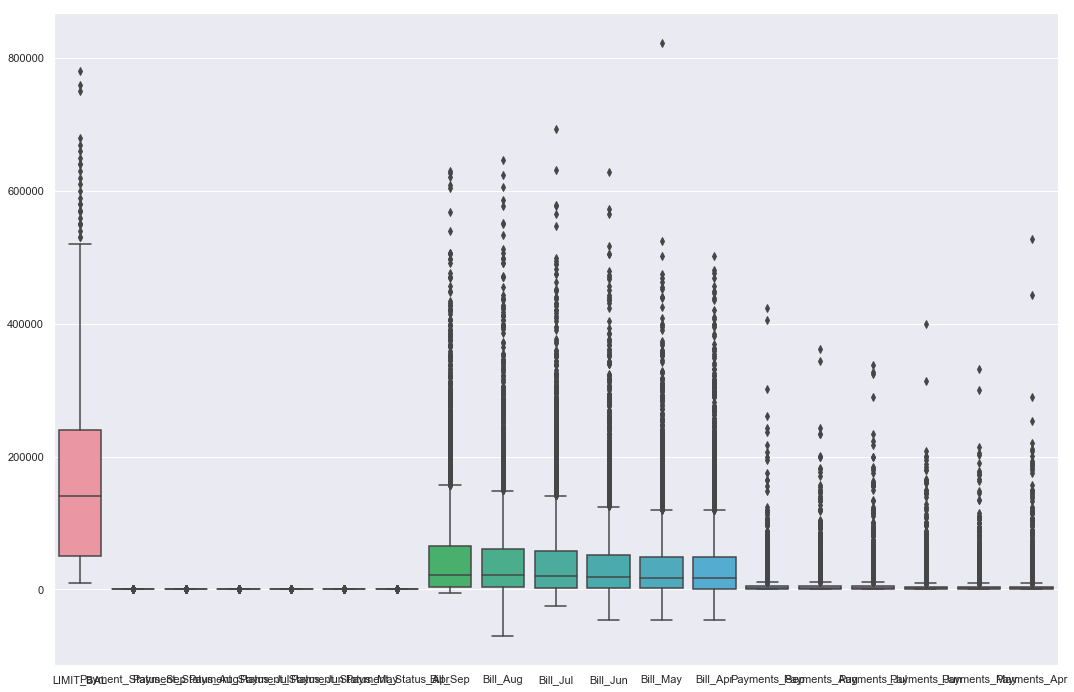

In [17]:
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(data=cols)

## 3. Feature Engineering

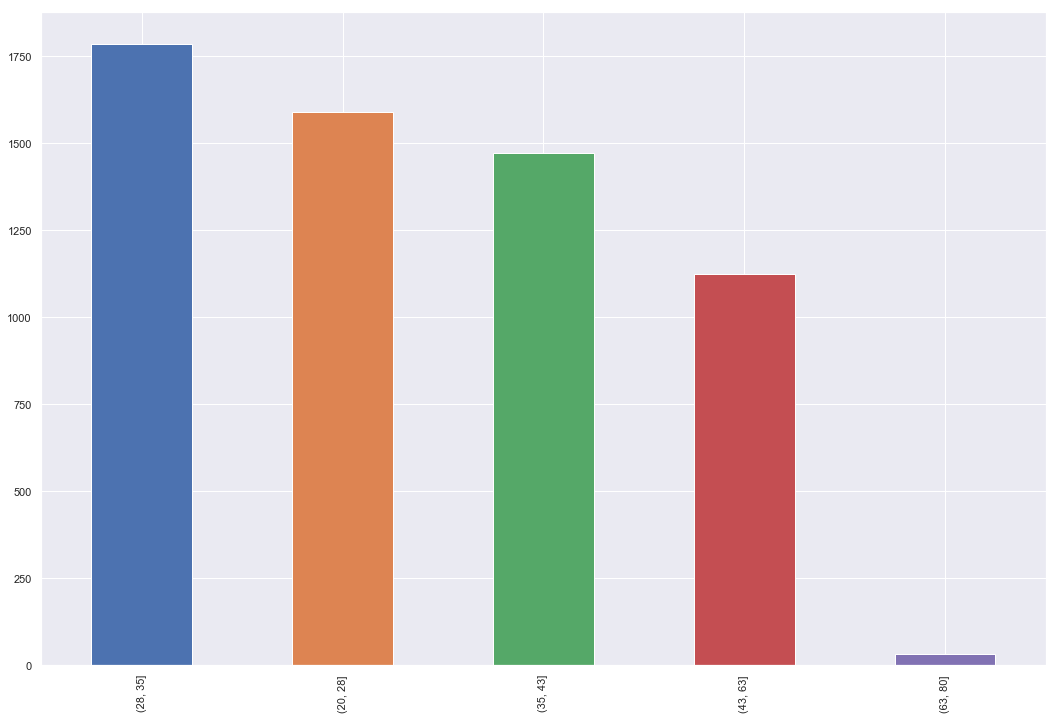

In [18]:
bins = [20, 28, 35, 43, 63, 80]
bins_age = pd.cut(df['AGE'], bins)
bins_age = bins_age.cat.as_unordered()
bins_age.value_counts().plot(kind='bar')

In [19]:
df['AGE']=bins_age

In [20]:
age_dummies = pd.get_dummies(df['AGE'], prefix="age", drop_first=True)
df = df.drop('AGE', axis=1)
df = pd.concat([df, age_dummies], axis=1)

In [21]:
marriage_dummies = pd.get_dummies(df['MARRIAGE'], prefix="marriage", drop_first=True)
df = df.drop('MARRIAGE', axis=1)
df = pd.concat([df, marriage_dummies], axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,Payment_Status_Sep,Payment_Status_Aug,Payment_Status_Jul,Payment_Status_Jun,Payment_Status_May,Payment_Status_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,Payments_Sep,Payments_Aug,Payments_Jul,Payments_Jun,Payments_May,Payments_Apr,"age_(28, 35]","age_(35, 43]","age_(43, 63]","age_(63, 80]",marriage_1,marriage_2,marriage_3
0,30000,1,1,0,0,0,0,0,-1,17960,18968,19958,21448,15567,22,1610,1600,2050,341,22,5000,1,0,0,0,0,1,0
1,640000,2,1,0,0,0,0,0,0,116714,77893,60259,40539,26432,5018,4000,4000,2003,7202,5314,3535,1,0,0,0,0,1,0
2,270000,2,1,0,0,0,0,-1,-1,14728,20865,24812,12674,9486,2460,10000,5000,3900,9486,2460,0,1,0,0,0,0,1,0
3,160000,1,1,0,0,2,2,-1,2,4024,6484,3503,-473,3757,3286,3000,0,0,4700,0,3000,0,1,0,0,1,0,0
4,160000,2,2,-1,-1,-1,-1,0,0,1532,0,465,1791,1644,956,0,465,1792,33,0,2394,0,0,0,0,0,1,0


In [22]:
df['median_inc_edu'] = 0
df.loc[df['EDUCATION'] == 1, 'median_inc_edu'] = 831496
df.loc[df['EDUCATION'] == 2, 'median_inc_edu'] = 575575
df.loc[df['EDUCATION'] == 3, 'median_inc_edu'] = 526270
df.loc[df['EDUCATION'] == 4, 'median_inc_edu'] = 417073
df.loc[df['EDUCATION'] == 5, 'median_inc_edu'] = 394230
df.loc[df['EDUCATION'] == 6, 'median_inc_edu'] = 292370
df.loc[df['EDUCATION'] == 0, 'median_inc_edu'] = 831496

In [23]:
columns = ['Bill_Sep','Bill_Aug','Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
       'Payments_Sep', 'Payments_Aug', 'Payments_Jul', 'Payments_Jun',
       'Payments_May', 'Payments_Apr']
df[columns]=df[columns].replace(0.000000,0.00000001)

In [24]:
df['Bill_Percent_Change_AprMay'] = 1 - (df['Bill_May']/df['Bill_Apr'])
df['Bill_Percent_Change_MayJun'] = 1 - (df['Bill_Jun']/df['Bill_May'])
df['Bill_Percent_Change_JunJul'] = 1 - (df['Bill_Jul']/df['Bill_Jun'])
df['Bill_Percent_Change_JulAug'] = 1 - (df['Bill_Aug']/df['Bill_Jul'])
df['Bill_Percent_Change_AugSep'] = 1 - (df['Bill_Sep']/df['Bill_Aug']) 

In [25]:
df['Bill_Percent_of_Income_Apr'] = df['Bill_Apr']/df['median_inc_edu']
df['Bill_Percent_of_Income_May'] = df['Bill_May']/df['median_inc_edu']
df['Bill_Percent_of_Income_Jun'] = df['Bill_Jun']/df['median_inc_edu']
df['Bill_Percent_of_Income_Jul'] = df['Bill_Jul']/df['median_inc_edu']
df['Bill_Percent_of_Income_Aug'] = df['Bill_Aug']/df['median_inc_edu']
df['Bill_Percent_of_Income_Sep'] = df['Bill_Sep']/df['median_inc_edu']

In [26]:
edu_dummies = pd.get_dummies(df['EDUCATION'], prefix="edu", drop_first=True)
df = df.drop('EDUCATION', axis=1)
df = pd.concat([df, edu_dummies], axis=1)
df.head()

,LIMIT_BAL,SEX,Payment_Status_Sep,Payment_Status_Aug,Payment_Status_Jul,Payment_Status_Jun,Payment_Status_May,Payment_Status_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,Payments_Sep,Payments_Aug,Payments_Jul,Payments_Jun,Payments_May,Payments_Apr,"age_(28, 35]","age_(35, 43]","age_(43, 63]","age_(63, 80]",marriage_1,marriage_2,marriage_3,median_inc_edu,Bill_Percent_Change_AprMay,Bill_Percent_Change_MayJun,Bill_Percent_Change_JunJul,Bill_Percent_Change_JulAug,Bill_Percent_Change_AugSep,Bill_Percent_of_Income_Apr,Bill_Percent_of_Income_May,Bill_Percent_of_Income_Jun,Bill_Percent_of_Income_Jul,Bill_Percent_of_Income_Aug,Bill_Percent_of_Income_Sep,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6
0,30000,1,0,0,0,0,0,-1,17960.0,1.896800e+04,19958.0,21448.0,15567.0,22.0,1.610000e+03,1.600000e+03,2.050000e+03,341.0,2.200000e+01,5.000000e+03,1,0,0,0,0,1,0,831496,-706.590909,-0.377786,0.069470,0.049604,5.314213e-02,0.000026,0.018722,0.025794,0.024003,2.281190e-02,0.021600,1,0,0,0,0,0
1,640000,2,0,0,0,0,0,0,116714.0,7.789300e+04,60259.0,40539.0,26432.0,5018.0,4.000000e+03,4.000000e+03,2.003000e+03,7202.0,5.314000e+03,3.535000e+03,1,0,0,0,0,1,0,831496,-4.267437,-0.533709,-0.486445,-0.292637,-4.983888e-01,0.006035,0.031788,0.048754,0.072471,9.367814e-02,0.140366,1,0,0,0,0,0
2,270000,2,0,0,0,0,-1,-1,14728.0,2.086500e+04,24812.0,12674.0,9486.0,2460.0,1.000000e+04,5.000000e+03,3.900000e+03,9486.0,2.460000e+03,1.000000e-08,1,0,0,0,0,1,0,831496,-2.856098,-0.336074,-0.957709,0.159076,2.941289e-01,0.002959,0.011408,0.015242,0.029840,2.509333e-02,0.017713,1,0,0,0,0,0
3,160000,1,0,0,2,2,-1,2,4024.0,6.484000e+03,3503.0,-473.0,3757.0,3286.0,3.000000e+03,1.000000e-08,1.000000e-08,4700.0,1.000000e-08,3.000000e+03,0,1,0,0,1,0,0,831496,-0.143335,1.125898,8.405920,-0.850985,3.793954e-01,0.003952,0.004518,-0.000569,0.004213,7.797993e-03,0.004839,1,0,0,0,0,0
4,160000,2,-1,-1,-1,-1,0,0,1532.0,1.000000e-08,465.0,1791.0,1644.0,956.0,1.000000e-08,4.650000e+02,1.792000e+03,33.0,1.000000e-08,2.394000e+03,0,0,0,0,0,1,0,575575,-0.719665,-0.089416,0.740369,1.000000,-1.532000e+11,0.001661,0.002856,0.003112,0.000808,1.737393e-14,0.002662,0,1,0,0,0,0


## 4. Feature Selection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)  
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## 4.1 Resampling

In [27]:
def resamplingDataPrep(X_train, y_train, target_var): # ! should be be call upSamplingDataPrep?
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [28]:
def upSampleMinority(target_var, minority_class, majority_class):  # ! double check params needed
    # upsample minority
    minority_upsampled = resample(minority_class,
                          replace=True, # sample with replacement
                          n_samples=len(majority_class), # match number in majority class
                          random_state=23) # reproducible results
    # combine majority and upsampled minority
    upsampled = pd.concat([majority_class, minority_upsampled])
    # check new class counts
    print(upsampled[target_var].value_counts())
    # return new upsampled X_train, y_train
    X_train_upsampled = upsampled.drop(target_var, axis=1)
    y_train_upsampled = upsampled[target_var]
    return X_train_upsampled, y_train_upsampled


def upSampleMinoritySMOTE(X_train, y_train):
    sm = SMOTE(random_state=23, ratio=1.0)
    X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [29]:
def downSampleMajority(target_var, minority_class, majority_class):
    # downsample majority
    majority_downsampled = resample(majority_class,
                                    replace = False, # sample without replacement
                                    n_samples = len(defaulted), # match minority n
                                    random_state = 23) # reproducible results
    # combine majority and upsampled minority
    downsampled = pd.concat([majority_downsampled, minority_class])
    # check new class counts
    print(downsampled[target_var].value_counts())
    # return new downsampled X_train, y_train
    X_train_downsampled = downsampled.drop(target_var, axis=1)
    y_train_downsampled = downsampled[target_var]
    return X_train_downsampled, y_train_downsampled

def downSampleMajorityTomekLinks(X_train, y_train):
    tl = TomekLinks()
    X_train_tl, y_train_tl = tl.fit_sample(X_train, y_train)
    print(X_train_tl.count(), len(y_train_tl))
    return X_train_tl, y_train_tl

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

### KNN

In [30]:
def knnTrainTest(k_number, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k_number)
    # train
    knn.fit(X_train, y_train)
    # test
    y_pred_class = knn.predict(X_test)


    # check Accuracy
    print('Test Accuracy score: ', accuracy_score(y_test, y_pred_class))
    # check F1 score
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    return y_pred_class

### Logistic Regression

In [31]:
# helper function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def logiRegr(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    # examine coefficients
    # print(zip(X_train.columns, logreg.coef_[0]))
    # print(logreg.coef_)
    # class predictions (not predicted probabilities)
    y_pred_class = logreg.predict(X_test)
    print('Classification Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print('Test F1 score: ', f1_score(y_test, y_pred_class))
    # plot confusion matrix
    cm = confusion_matrix(y_test,y_pred_class)
    classes = ['DEFAULT', 'NON-default']
    plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Decision Tree

In [32]:
def deciTree(X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier() # Create Decision Tree classifer object
    clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
    y_pred_train = clf.predict(X_train) #predict the training set
    y_pred_test = clf.predict(X_test) #Predict the response for test dataset

    # Model Accuracy, how often is the classifier correct?
    print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
    print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

## 6. Model Evaluation

In [46]:
df2 = pd.read_csv('classification_lab_data.csv')

## 7. Final Model

In [40]:
clf = DecisionTreeClassifier(random_state=1,criterion='gini')
y_pred_test = clf.predict(df)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
final = pd.DataFrame(y_pred_test)
final.to_csv('Francis_Jon.csv')